In [1]:
import pandas as pd

## 1 Data Exploration

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.isnull().sum()       #no. of missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 2 Correlation Analysis

In [7]:
# Correlation matrix
correlation_matrix = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].corr()
print(correlation_matrix)

                   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
Item_Weight           1.000000        -0.014048  0.027141           0.014123
Item_Visibility      -0.014048         1.000000 -0.001315          -0.128625
Item_MRP              0.027141        -0.001315  1.000000           0.567574
Item_Outlet_Sales     0.014123        -0.128625  0.567574           1.000000


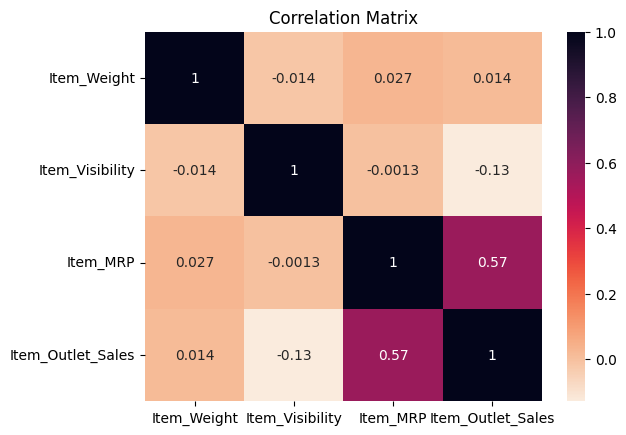

In [15]:
# Optional: Visualize correlations
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r')
plt.title("Correlation Matrix")
plt.show()


## 3 Categorical Variable Analysis

In [16]:
# Group by Item_Type
item_type_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
print(item_type_sales.sort_values(ascending=False))

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64


In [29]:
item_type_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
print(item_type_sales.sort_values(ascending=False))

Item_Type
Fruits and Vegetables    2.820060e+06
Snack Foods              2.732786e+06
Household                2.055494e+06
Frozen Foods             1.825735e+06
Dairy                    1.522594e+06
Canned                   1.444151e+06
Baking Goods             1.265525e+06
Health and Hygiene       1.045200e+06
Meat                     9.175656e+05
Soft Drinks              8.928977e+05
Breads                   5.532372e+05
Hard Drinks              4.577934e+05
Starchy Foods            3.514013e+05
Others                   3.255176e+05
Breakfast                2.322990e+05
Seafood                  1.488682e+05
Name: Item_Outlet_Sales, dtype: float64


In [17]:
# Group by Outlet_Type
outlet_type_sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
print(outlet_type_sales.sort_values(ascending=False))

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64


In [30]:
outlet_type_sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
print(outlet_type_sales.sort_values(ascending=False))

Outlet_Type
Supermarket Type1    1.291734e+07
Supermarket Type3    3.453926e+06
Supermarket Type2    1.851823e+06
Grocery Store        3.680343e+05
Name: Item_Outlet_Sales, dtype: float64


In [18]:
# Group by Outlet_Location_Type
location_type_sales = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
print(location_type_sales.sort_values(ascending=False))

Outlet_Location_Type
Tier 2    2323.990559
Tier 3    2279.627651
Tier 1    1876.909159
Name: Item_Outlet_Sales, dtype: float64


## 4 Handle Missing Data

In [22]:
# Check rows with missing Item_Weight
missing_weights = df[df['Item_Weight'].isnull()]
missing_weights.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [21]:
# Check rows with missing Outlet_Size
missing_outlet_size = df[df['Outlet_Size'].isnull()]
missing_outlet_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [27]:
# Filling missing values in 'Item_Weight' column
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

# Filling missing values in 'Outlet_Size' column
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])


In [28]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
MRP_Range                    0
dtype: int64

## 5 Anamoly Detection

In [25]:
visibility_anomalies = df[df['Item_Visibility'] == 0]
print(visibility_anomalies.shape)

# Optionally replace 0 values with the mean
df.loc[df['Item_Visibility'] == 0, 'Item_Visibility'] = df['Item_Visibility'].mean()


(526, 12)


## 6 Price and Sales Trends

C:\Users\deven\AppData\Local\Temp\ipykernel_9560\1298720844.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mrp_sales = df.groupby('MRP_Range')['Item_Outlet_Sales'].mean()


MRP_Range
0-50        615.683818
51-100     1201.948711
101-150    1891.408858
151-200    2722.210833
201-250    3600.741323
251-300    3853.968305
Name: Item_Outlet_Sales, dtype: float64


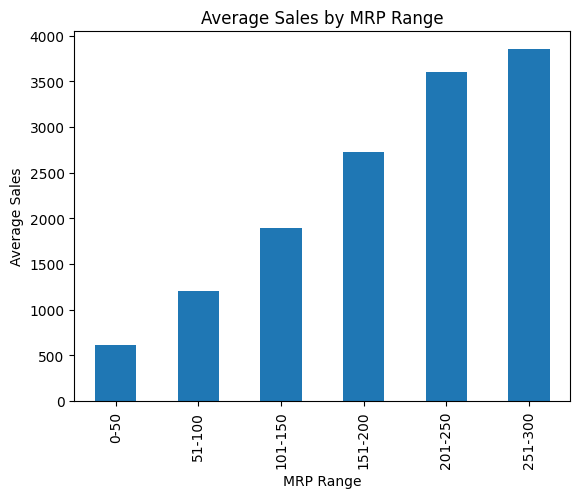

In [26]:
# Create MRP ranges
df['MRP_Range'] = pd.cut(df['Item_MRP'], bins=[0, 50, 100, 150, 200, 250, 300], 
                           labels=['0-50', '51-100', '101-150', '151-200', '201-250', '251-300'])

# Group by MRP ranges
mrp_sales = df.groupby('MRP_Range')['Item_Outlet_Sales'].mean()
print(mrp_sales)

# Optional: Bar plot
mrp_sales.plot(kind='bar', title="Average Sales by MRP Range", ylabel='Average Sales', xlabel='MRP Range')
plt.show()
